# Transformação para variáveis cíclicas

Modelos de _machine learning_ precisam de alguns tratamentos para performar bem com alguns tipos de variáveis.

Variáveis categóricas, por exemplo, _One Hot Enconding_ é uma clássica transformação.

Pense agora que você possui um sistema que seja dependente da hora do dia. Temos então 24 horas em um dia, podemos tratar como se fossem 24 categorias, por exemplo? _One Hot Enconding_ funcionaria? Pode ser que sim. _Target Enconding_ talvez seria melhor? Também, pode ser que sim.

Porém, lembre do seguinte fato: as horas de uma dia são variáveis cíclicas, ou seja, após 23h, vem 0h. Pense no intervalo entre essas variáveis sem nenhum tratamento. É como se tivesse um degrau de magnitude 23 entre os dois, quando na verdade, é apenas de 1h.

Uma forma de tratar esse tipo de variáveis cíclicas, e qualquer outra, de maneira muito elegante: transformar essa variável para obter duas variáveis novas representadas por um seno e um cosseno

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (10, 8)
for spine in ['top', 'right']:
    plt.rcParams[f'axes.spines.{spine}'] = False

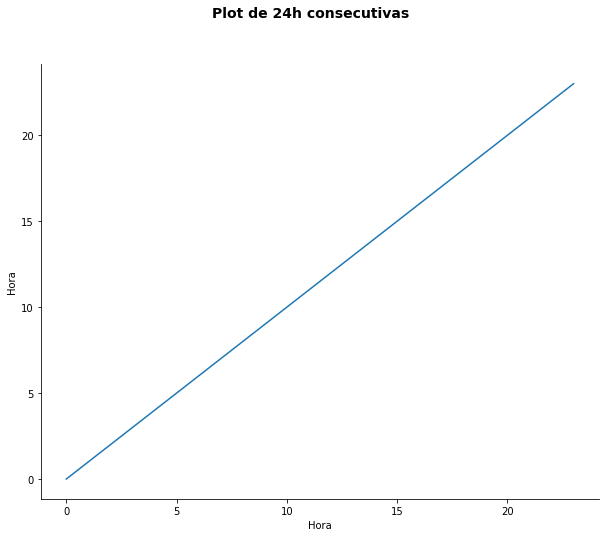

In [3]:
horas = np.linspace(0, 23, 24, dtype=int)
fig, ax = plt.subplots()
ax.plot(horas)
ax.set_ylabel('Hora')
ax.set_xlabel('Hora')
plt.suptitle("Plot de 24h consecutivas", fontweight='bold', fontsize=14)
plt.tight_layout;

A formulação é bem simples:
$$X_{sin} = sin\frac{2*\pi*x}{max(x)}$$

sendo

- $2*\pi$ para formar o círculo;
- $x$ no nominador para saber em que ponto do círculo
- $max(x)$ para obter a resolução

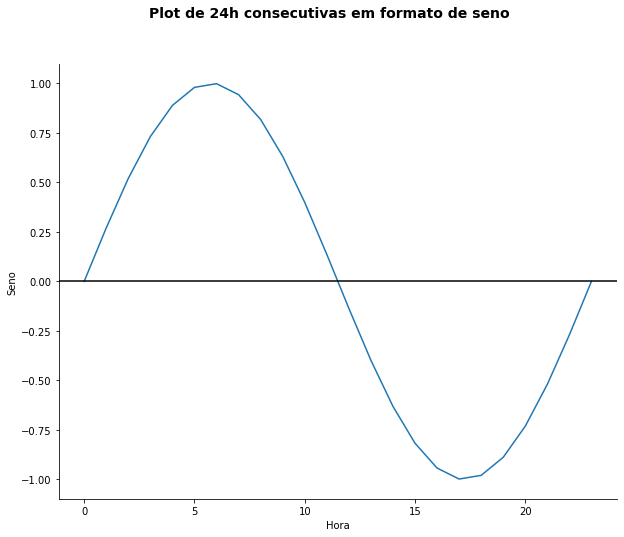

In [4]:
sin_horas = np.sin((2 * np.pi * horas) / horas.max())
fig, ax = plt.subplots()
ax.plot(sin_horas)
ax.axhline(y=0, c='k')
ax.set_ylabel('Seno')
ax.set_xlabel('Hora')
plt.suptitle("Plot de 24h consecutivas em formato de seno", fontweight='bold', fontsize=14)
plt.tight_layout;

Porém, utilizando somente a representação de seno, veja o que acontece:

- se traçarmos um linha reta em uma região do eixo $y$, nós interceptamos o sinal do seno em dois pontos em um ciclo completo;
- é como se 0h = 12h, o que é incorreto

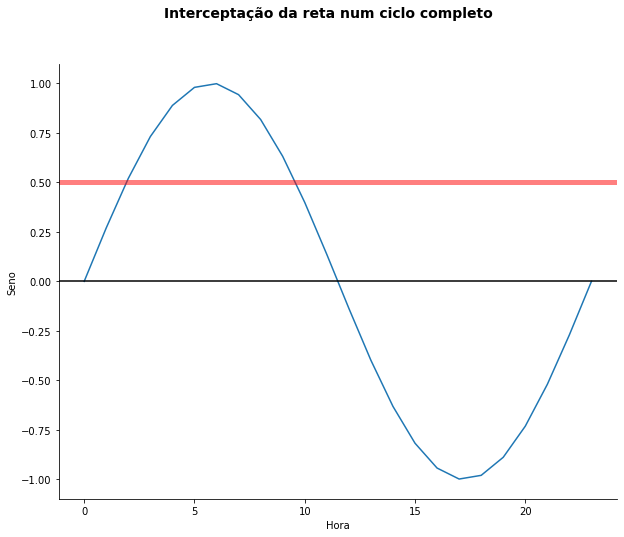

In [5]:
fig, ax = plt.subplots()
ax.plot(sin_horas)
ax.axhline(y=0, c='k')
ax.axhline(y=0.5, c='r', lw=5, alpha=0.5)
ax.set_ylabel('Seno')
ax.set_xlabel('Hora')
plt.suptitle("Interceptação da reta num ciclo completo", fontweight='bold', fontsize=14)
plt.tight_layout;

A correção pode ser feita defasando o seno: pegue o conseno! Assim, os pontos agora serão sempre diferentes, daí então você terá a representação das 24 de maneira correta! Você agora está pegando tanto o seno como o coseno

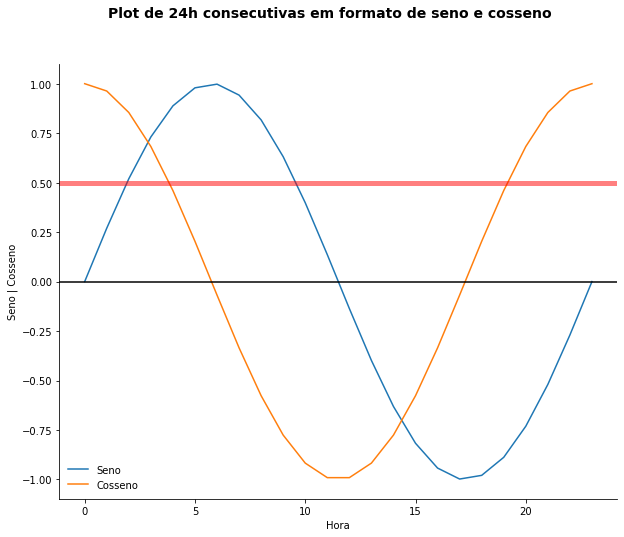

In [6]:
cos_horas = np.cos((2 * np.pi * horas) / horas.max())
fig, ax = plt.subplots()
ax.plot(sin_horas, label='Seno')
ax.plot(cos_horas, label='Cosseno')
ax.legend(frameon=False)
ax.axhline(y=0, c='k')
ax.axhline(y=0.5, c='r', lw=5, alpha=0.5)
ax.set_ylabel('Seno | Cosseno')
ax.set_xlabel('Hora')
plt.suptitle("Plot de 24h consecutivas em formato de seno e cosseno", fontweight='bold', fontsize=14)
plt.tight_layout;

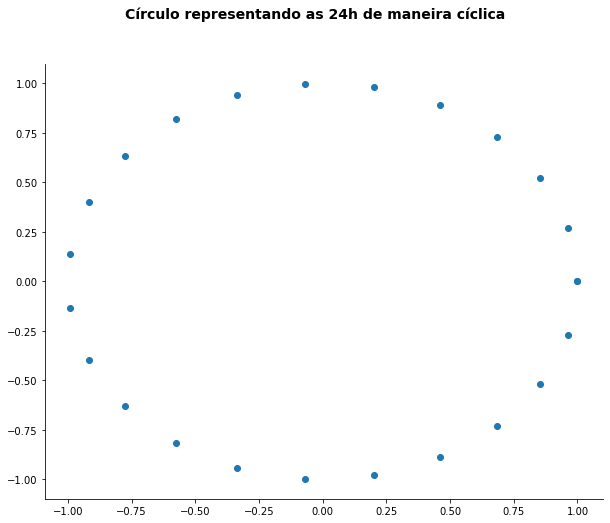

In [7]:
fig, ax = plt.subplots()
ax.scatter(x=cos_horas, y=sin_horas)

plt.suptitle("Círculo representando as 24h de maneira cíclica", fontweight='bold', fontsize=14)
plt.tight_layout;

## Transformação inversa

A transformação inversa pode ser feita (com um pouco de geometria) utilizando o arco tangente

In [8]:
n = 24
x = n * np.random.rand()
print(f"Original: {x}")
seno = np.sin(x * 2 * np.pi / n)
cosseno = np.cos(x * 2 * np.pi / n)
inverse = (np.arctan2(seno, cosseno) / (2 * np.pi)) * n
inverse = inverse if inverse >= 0 else (n / 2) + ((n / 2) + inverse)
print(f"Inverso: {inverse}")
np.testing.assert_almost_equal(x, inverse)

Original: 13.35350173726239
Inverso: 13.353501737262391


## Pontos fracos

- pode não ser a melhor forma de _enconding_ para modelos de árvores por causa do _split_;
- algoritmos que utilizam noções de distância podem não se beneficiar tão bem dessas features;

# Direção em 360 graus

Imagine que em seus dados, você recebe dados de vento, como direção e velocidade. A direção, da mesma forma que as variáveis de tempo, também é cíclica. Podemos então gerar o mesmo tipo de transformação, adicionando agora a questão de amplitude, que pode ser representada como a velocidade do vento naquela direção

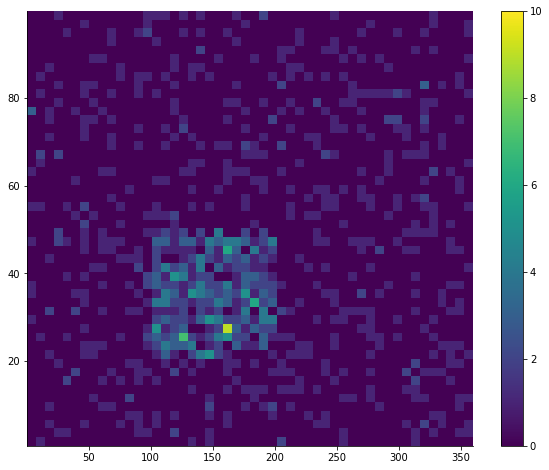

In [9]:
n = 1000
vel_vento = 100 * np.random.rand(n)
dir_vento = 360 * np.random.rand(n)
index = np.random.randint(0, n, int(n / 2))
dir_vento[index] = dir_vento[index] = (200 - 100) * np.random.rand(int(n / 2)) + 100  # definindo uma direção com maior concentração entre 200 e 100 graus
vel_vento[index] = vel_vento[index] = (50 - 20) * np.random.rand(int(n / 2)) + 20  # definindo uma velocidade com maior concentração entre 50 e 20 unidades de medida (m/s, por exemplo)

plt.hist2d(dir_vento, vel_vento, bins=(50, 50), vmax=10)
plt.colorbar();

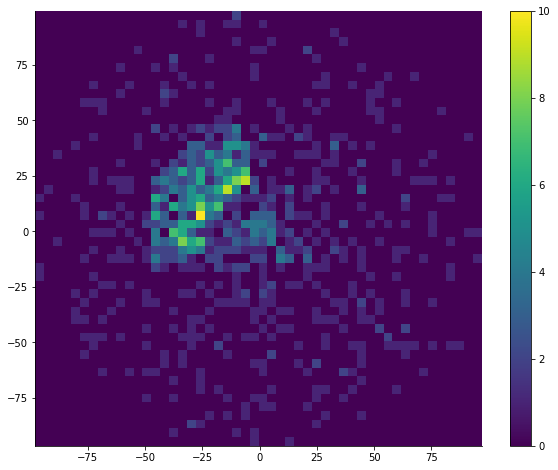

In [10]:
wd_rad = dir_vento * np.pi / 180

componente_x = vel_vento * np.cos(wd_rad)
componente_y = vel_vento * np.sin(wd_rad)

plt.hist2d(componente_x, componente_y, bins=(50, 50), vmax=10)
plt.colorbar();